In [2]:
import pandas as pd
import numpy as np

In [3]:
raw = pd.read_csv('./data/bank-additional-full.csv', sep = ';')
raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# one-hot-encoding
data = pd.get_dummies( raw, columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [5]:
data['y'] = np.where( data['y'] == 'yes', 1, 0)

In [6]:
input_var = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']

# xgboost

In [7]:
from xgboost import XGBRegressor

In [8]:
xgb = XGBRegressor(n_estimators = 300, learning_rate = 0.1)

In [9]:
xgb.fit( data[input_var], data['y'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Shap Value

In [10]:
import shap

In [11]:
# put the model we made in TreeExplainer function and then put it in shap_values function
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values( data[input_var] )

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


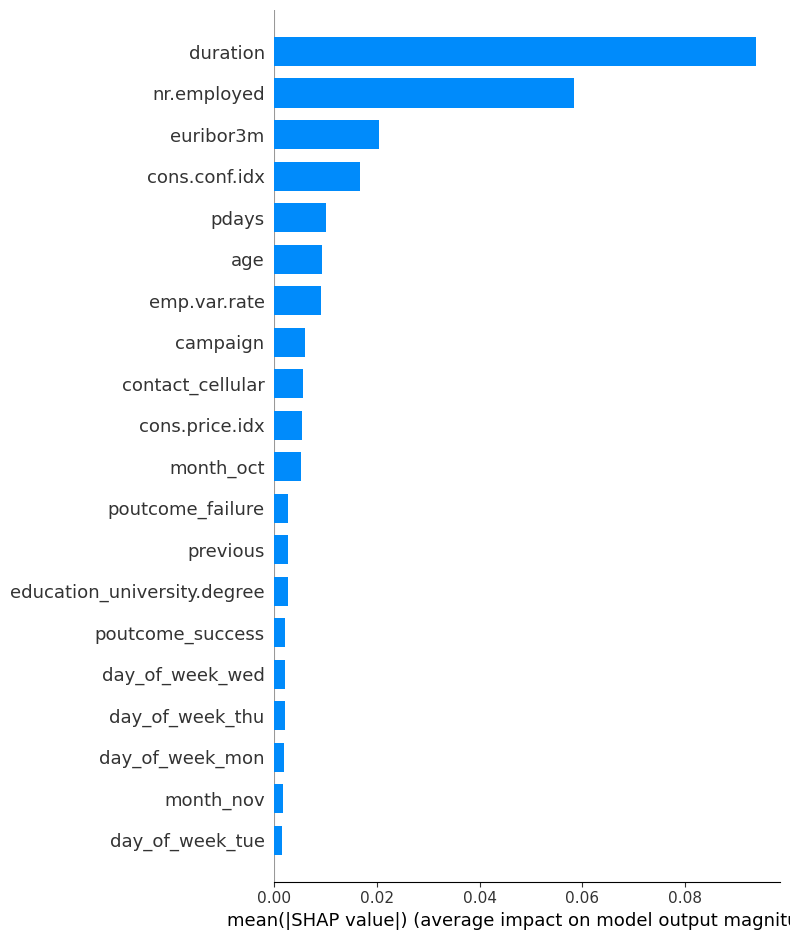

In [21]:
# visualize the result
shap.summary_plot( shap_values, data[input_var], plot_type = 'bar' )

### dependence plot

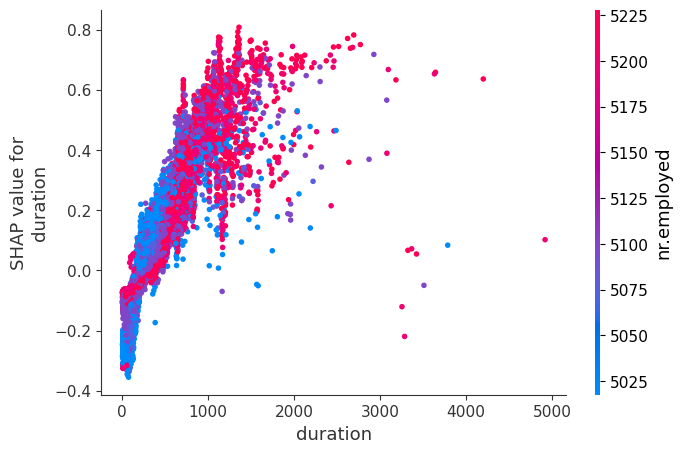

In [22]:
# this is a function which represents the relationship between input variables and a target variable
shap.dependence_plot( 'duration', shap_values, data[input_var])

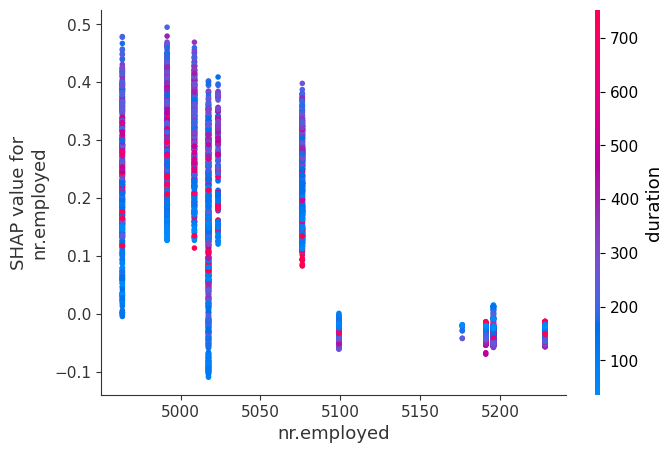

In [24]:
shap.dependence_plot( 'nr.employed', shap_values, data[input_var])

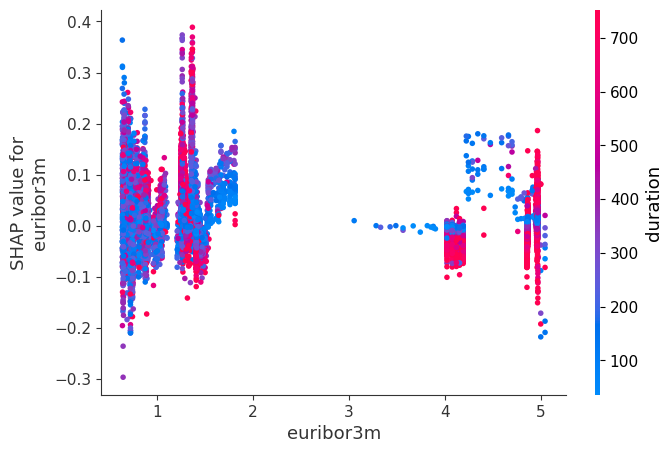

In [25]:
shap.dependence_plot( 'euribor3m' , shap_values , data[input_var] )

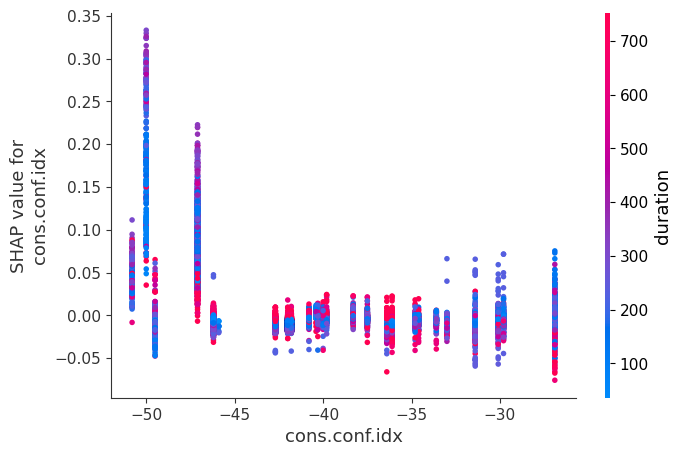

In [26]:
shap.dependence_plot( 'cons.conf.idx' , shap_values , data[input_var] )

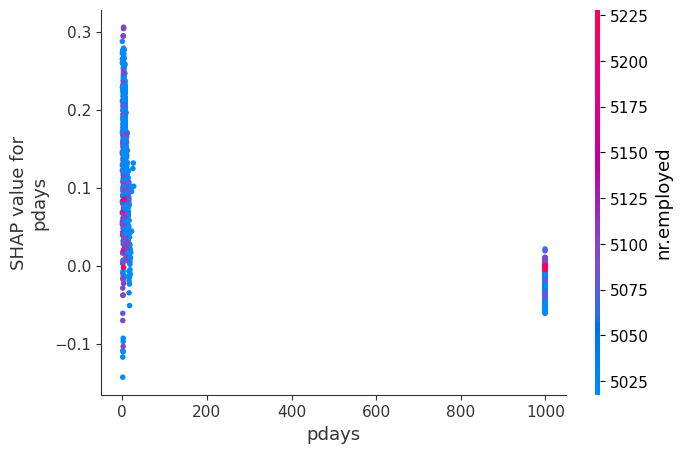

In [27]:
shap.dependence_plot( 'pdays' , shap_values , data[input_var] )

### force plot

In [28]:
prediction = xgb.predict(data[input_var])
data['pred'] = prediction

In [30]:
data['pred']

0        0.000357
1       -0.001140
2        0.000747
3       -0.000208
4        0.002844
           ...   
41183    0.882677
41184    0.342715
41185    0.092818
41186    0.964269
41187    0.093736
Name: pred, Length: 41188, dtype: float32

In [32]:
# force plot is a function which shows how a feature was predicted
shap.initjs()
shap.force_plot( explainer.expected_value, shap_values[41187], data[input_var].iloc[41187])